In [1]:
import geoplot as gplt 
import geoplot.crs as gcrs
import geopandas as gpd
gpd.__version__
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
from fiona.crs import from_epsg
import mapclassify as mc
import glob

In [2]:
coastline= gpd.read_file('./Coastlinse_khoa/Coastlinse_khoa.shp', encoding='utf8')  

In [6]:
MIN_15 = gpd.read_file('./Ex/220104/15분.shp', encoding='utf8') 
MIN_1 = gpd.read_file('./Ex/MIN1_DOWFSA_UTF8_mod/MIN1_DOWFSA_UTF8_mod.shp', encoding='utf8')  

<AxesSubplot:>

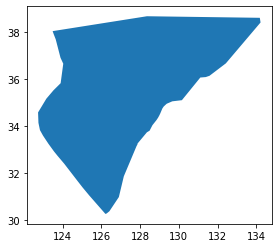

In [11]:
EEZ = gpd.read_file('./Ex/220104/EEZ폴리곤_수정.shp', encoding='utf8') 
EEZ.plot()

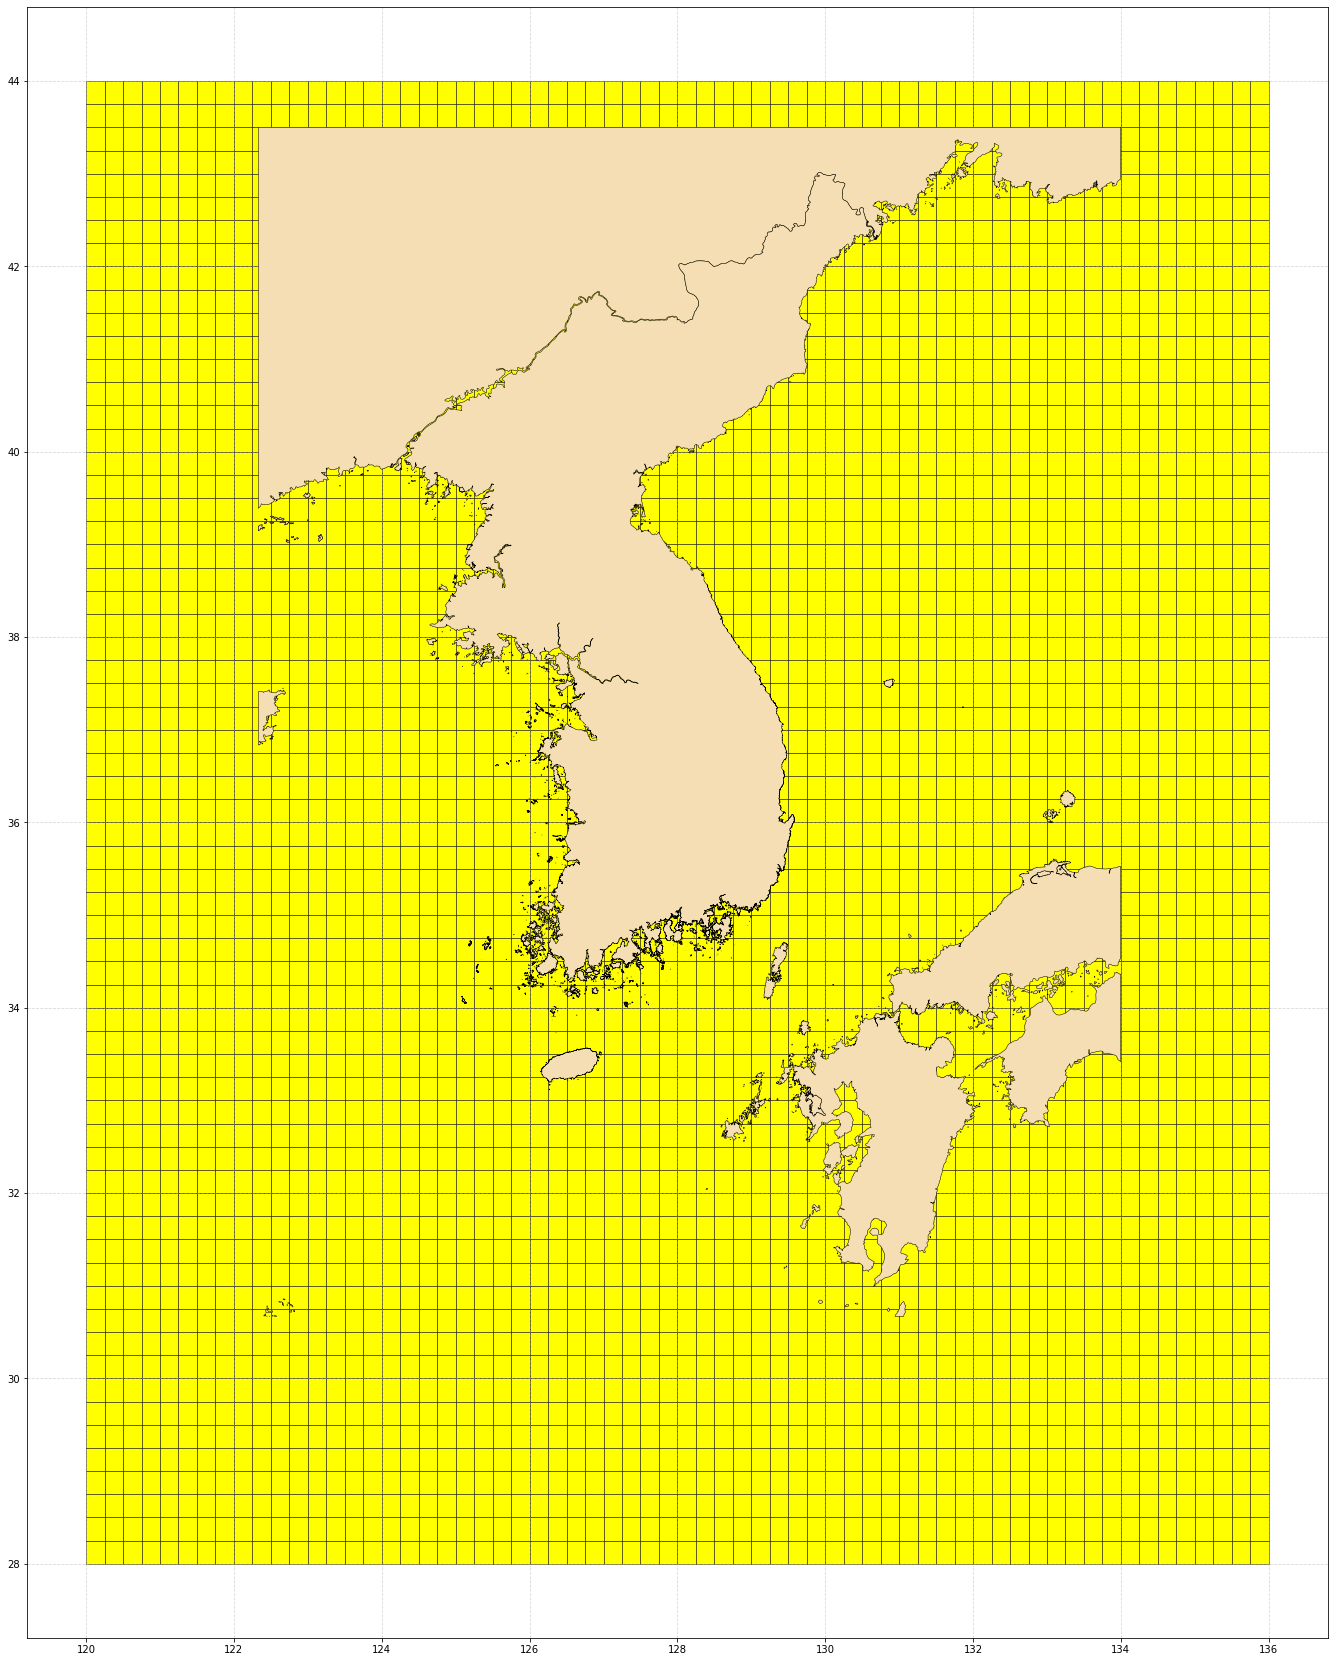

In [5]:
ax = MIN_15 .plot(figsize=(50, 30),facecolor='yellow', edgecolor='black',linewidth=0.5, zorder=1)
coastline.plot(facecolor='wheat', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
plt.grid(True, alpha=0.5, linestyle='--')

In [7]:
MIN_1

,MIN1,SA1_mod,MIN3,SA3_mod,geometry
0,GR9_F1G11_A1,1,GR3_F1G11_A,1,"POLYGON ((122.00000 39.00000, 122.01667 39.000..."
1,GR9_F1G11_A4,1,GR3_F1G11_A,1,"POLYGON ((122.00000 38.98333, 122.01667 38.983..."
2,GR9_F1G11_A7,1,GR3_F1G11_A,1,"POLYGON ((122.00000 38.96667, 122.01667 38.966..."
3,GR9_F1G11_F1,1,GR3_F1G11_F,1,"POLYGON ((122.00000 38.95000, 122.01667 38.950..."
4,GR9_F1G11_F4,1,GR3_F1G11_F,1,"POLYGON ((122.00000 38.93333, 122.01667 38.933..."
...,...,...,...,...,...
421195,GR9_K2G44_T6,1,GR3_K2G44_T,1,"POLYGON ((134.98333 30.08333, 135.00000 30.083..."
421196,GR9_K2G44_T9,1,GR3_K2G44_T,1,"POLYGON ((134.98333 30.06667, 135.00000 30.066..."
421197,GR9_K2G44_Y3,1,GR3_K2G44_Y,1,"POLYGON ((134.98333 30.05000, 135.00000 30.050..."
421198,GR9_K2G44_Y6,1,GR3_K2G44_Y,1,"POLYGON ((134.98333 30.03333, 135.00000 30.033..."


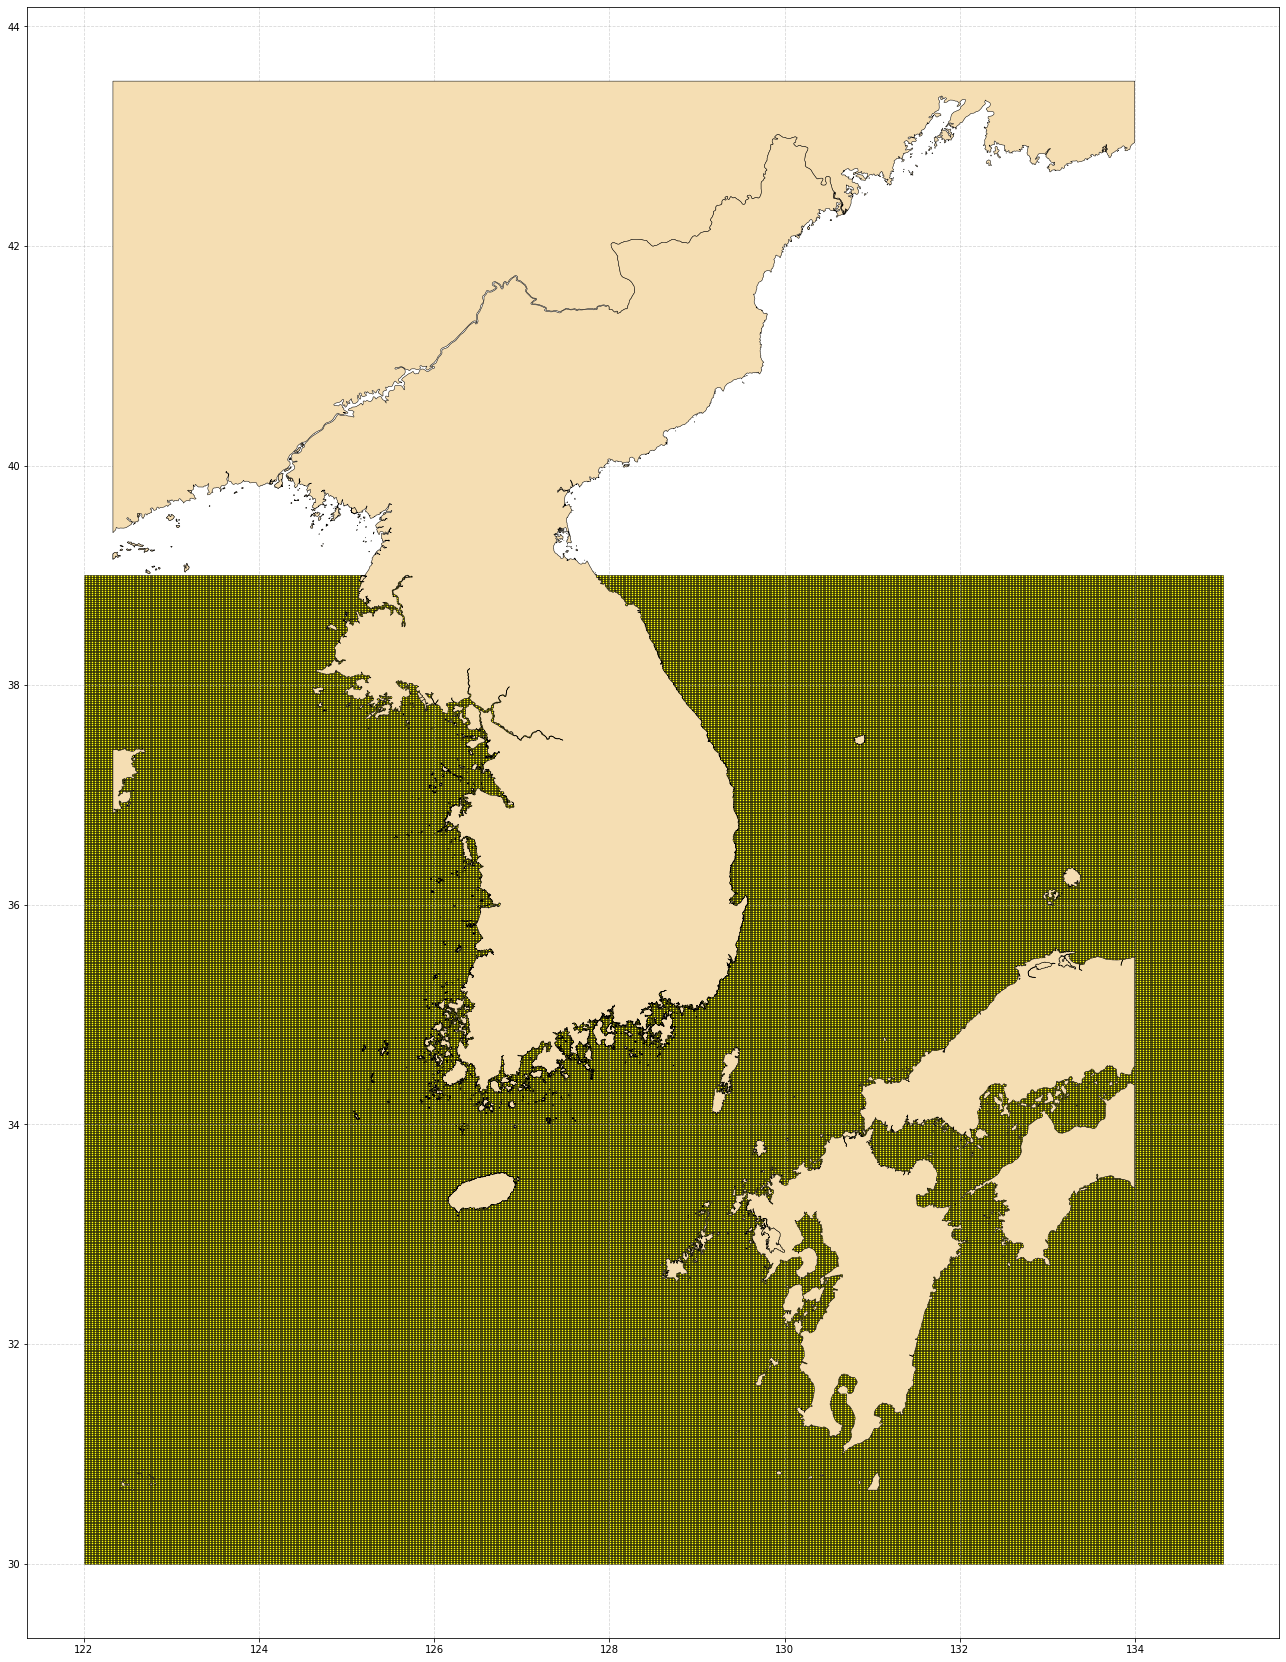

In [8]:
ax = MIN_1 .plot(figsize=(50, 30),facecolor='yellow', edgecolor='black',linewidth=0.5, zorder=1)
coastline.plot(facecolor='wheat', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
plt.grid(True, alpha=0.5, linestyle='--')

<AxesSubplot:>

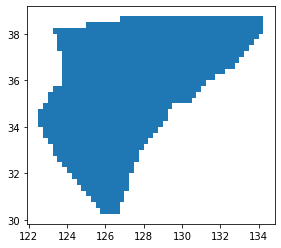

In [17]:
result1 = gpd.sjoin(MIN_15,EEZ, how='inner', op='intersects')
result1.plot()

In [23]:
result1.drop(['index_right'], axis=1,inplace=True)
result1

,gid,og_id,flag,geometry,Id,eez
1371,1372,GR2_F2G24,0,"POLYGON ((126.75000 38.75000, 127.00000 38.750...",0,1
1372,1373,GR2_F2H13,0,"POLYGON ((127.00000 38.75000, 127.25000 38.750...",0,1
1373,1374,GR2_F2H14,0,"POLYGON ((127.25000 38.75000, 127.50000 38.750...",0,1
1374,1375,GR2_F2H23,0,"POLYGON ((127.50000 38.75000, 127.75000 38.750...",0,1
1375,1376,GR2_F2H24,0,"POLYGON ((127.75000 38.75000, 128.00000 38.750...",0,1
...,...,...,...,...,...,...
3418,3419,GR2_J2G23,1,"POLYGON ((126.50000 30.75000, 126.75000 30.750...",0,1
3479,3480,GR2_J2F42,1,"POLYGON ((125.75000 30.50000, 126.00000 30.500...",0,1
3480,3481,GR2_J2G31,1,"POLYGON ((126.00000 30.50000, 126.25000 30.500...",0,1
3481,3482,GR2_J2G32,1,"POLYGON ((126.25000 30.50000, 126.50000 30.500...",0,1


<AxesSubplot:>

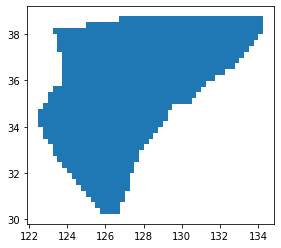

In [24]:
result2 = gpd.sjoin(MIN_1,result1, how='inner', op='intersects')
result2.plot()

In [27]:
result1

,gid,og_id,flag,geometry,Id,eez
1371,1372,GR2_F2G24,0,"POLYGON ((126.75000 38.75000, 127.00000 38.750...",0,1
1372,1373,GR2_F2H13,0,"POLYGON ((127.00000 38.75000, 127.25000 38.750...",0,1
1373,1374,GR2_F2H14,0,"POLYGON ((127.25000 38.75000, 127.50000 38.750...",0,1
1374,1375,GR2_F2H23,0,"POLYGON ((127.50000 38.75000, 127.75000 38.750...",0,1
1375,1376,GR2_F2H24,0,"POLYGON ((127.75000 38.75000, 128.00000 38.750...",0,1
...,...,...,...,...,...,...
3418,3419,GR2_J2G23,1,"POLYGON ((126.50000 30.75000, 126.75000 30.750...",0,1
3479,3480,GR2_J2F42,1,"POLYGON ((125.75000 30.50000, 126.00000 30.500...",0,1
3480,3481,GR2_J2G31,1,"POLYGON ((126.00000 30.50000, 126.25000 30.500...",0,1
3481,3482,GR2_J2G32,1,"POLYGON ((126.25000 30.50000, 126.50000 30.500...",0,1


In [25]:
result2

,MIN1,SA1_mod,MIN3,SA3_mod,geometry,index_right,gid,og_id,flag,Id,eez
15914,GR9_F3G12_Y9,1,GR3_F3G12_Y,1,"POLYGON ((122.48333 34.76667, 122.50000 34.766...",2378,2379,GR2_F3G23,1,0,1
15915,GR9_F3G14_E3,1,GR3_F3G14_E,1,"POLYGON ((122.48333 34.75000, 122.50000 34.750...",2378,2379,GR2_F3G23,1,0,1
15916,GR9_F3G14_E6,1,GR3_F3G14_E,1,"POLYGON ((122.48333 34.73333, 122.50000 34.733...",2378,2379,GR2_F3G23,1,0,1
15917,GR9_F3G14_E9,1,GR3_F3G14_E,1,"POLYGON ((122.48333 34.71667, 122.50000 34.716...",2378,2379,GR2_F3G23,1,0,1
15918,GR9_F3G14_J3,1,GR3_F3G14_J,1,"POLYGON ((122.48333 34.70000, 122.50000 34.700...",2378,2379,GR2_F3G23,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
396956,GR9_G2G34_P7,1,GR3_G2G34_P,1,"POLYGON ((134.25000 38.06667, 134.26667 38.066...",1528,1529,GR2_G2G33,1,0,1
396957,GR9_G2G34_U1,1,GR3_G2G34_U,1,"POLYGON ((134.25000 38.05000, 134.26667 38.050...",1528,1529,GR2_G2G33,1,0,1
396958,GR9_G2G34_U4,1,GR3_G2G34_U,1,"POLYGON ((134.25000 38.03333, 134.26667 38.033...",1528,1529,GR2_G2G33,1,0,1
396959,GR9_G2G34_U7,1,GR3_G2G34_U,1,"POLYGON ((134.25000 38.01667, 134.26667 38.016...",1528,1529,GR2_G2G33,1,0,1


In [28]:
result1.to_file('./result/ex4/15분격자EEZ로자른거.shp', encoding='euckr')
result2.to_file('./result/ex4/15분격자EEZ로자른걸1분에조인한거.shp', encoding='euckr')

C:\Users\PPARK\AppData\Local\Temp/ipykernel_9180/2696593981.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result2.to_file('./result/ex4/15분격자EEZ로자른걸1분에조인한거.shp', encoding='euckr')


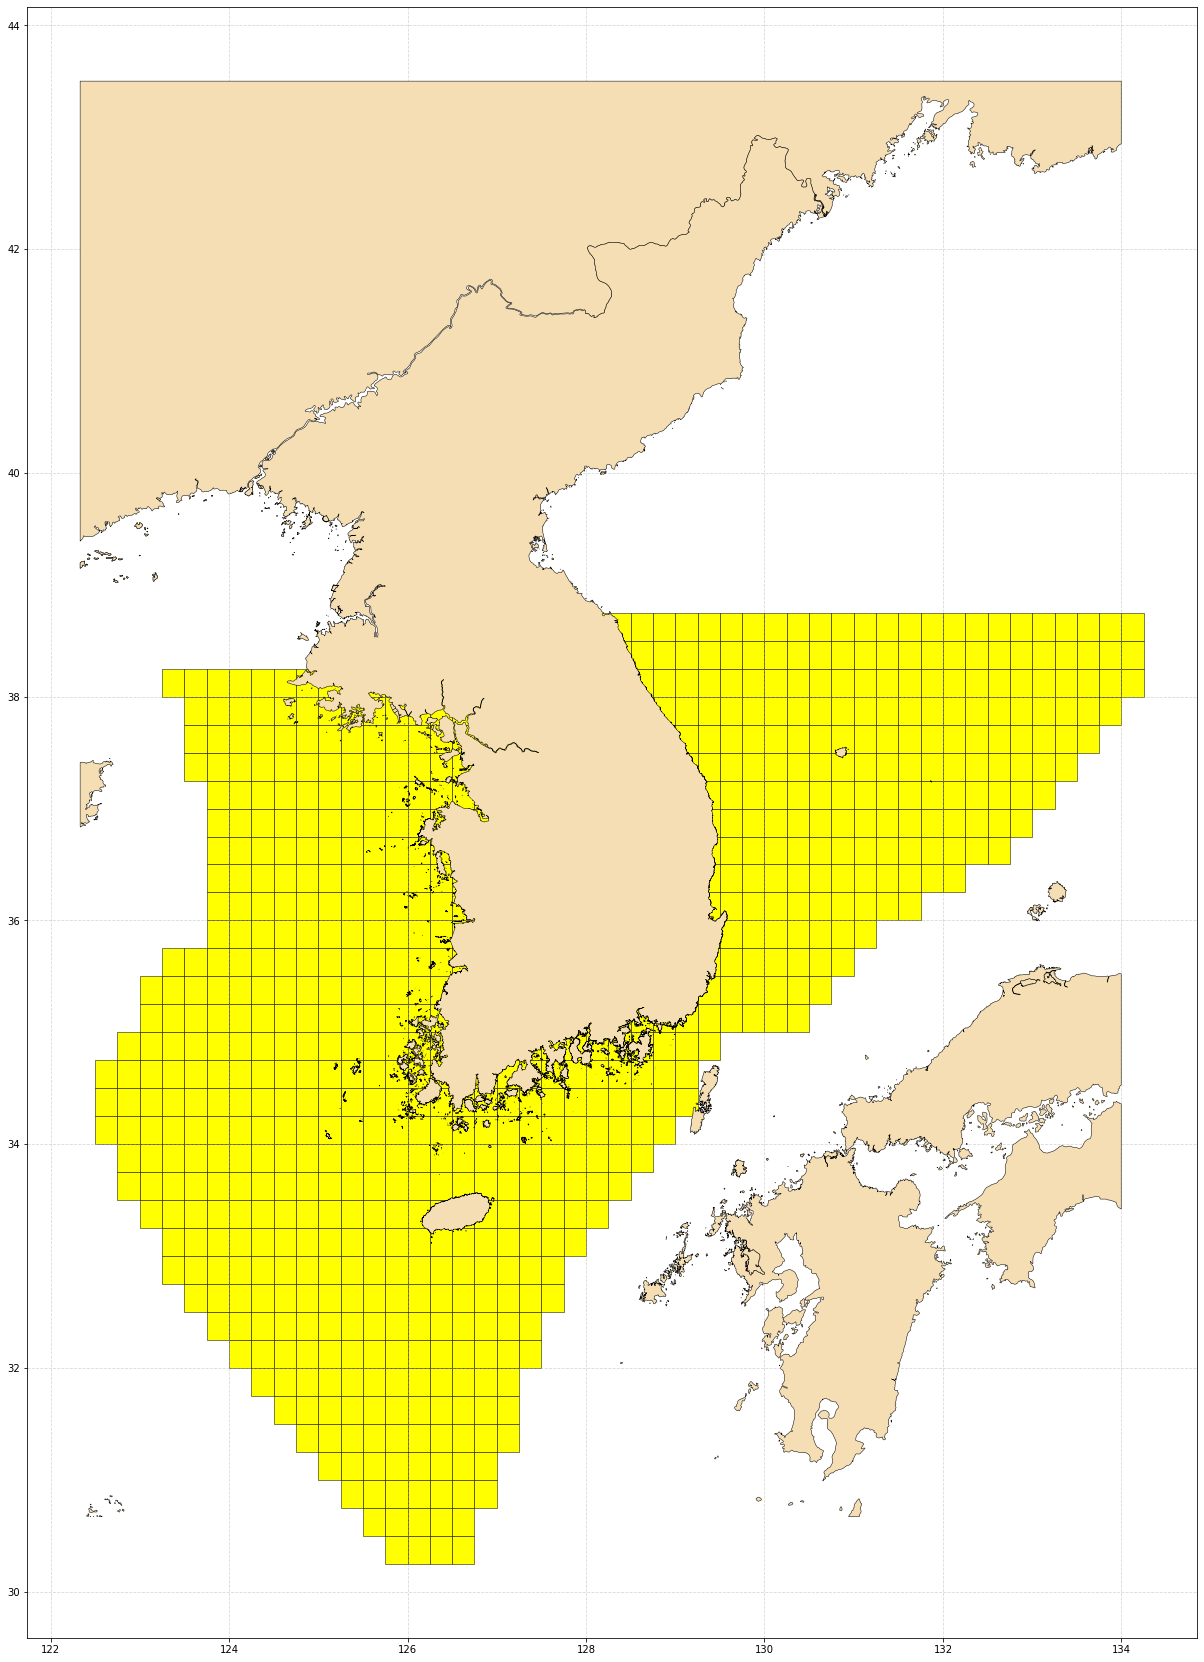

In [31]:
ax = result1.plot(figsize=(50, 30),facecolor='yellow', edgecolor='black',linewidth=0.5, zorder=1)
coastline.plot(facecolor='wheat', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
plt.grid(True, alpha=0.5, linestyle='--')
plt.savefig('./result/ex4/15분격자EEZ로자른거.png')

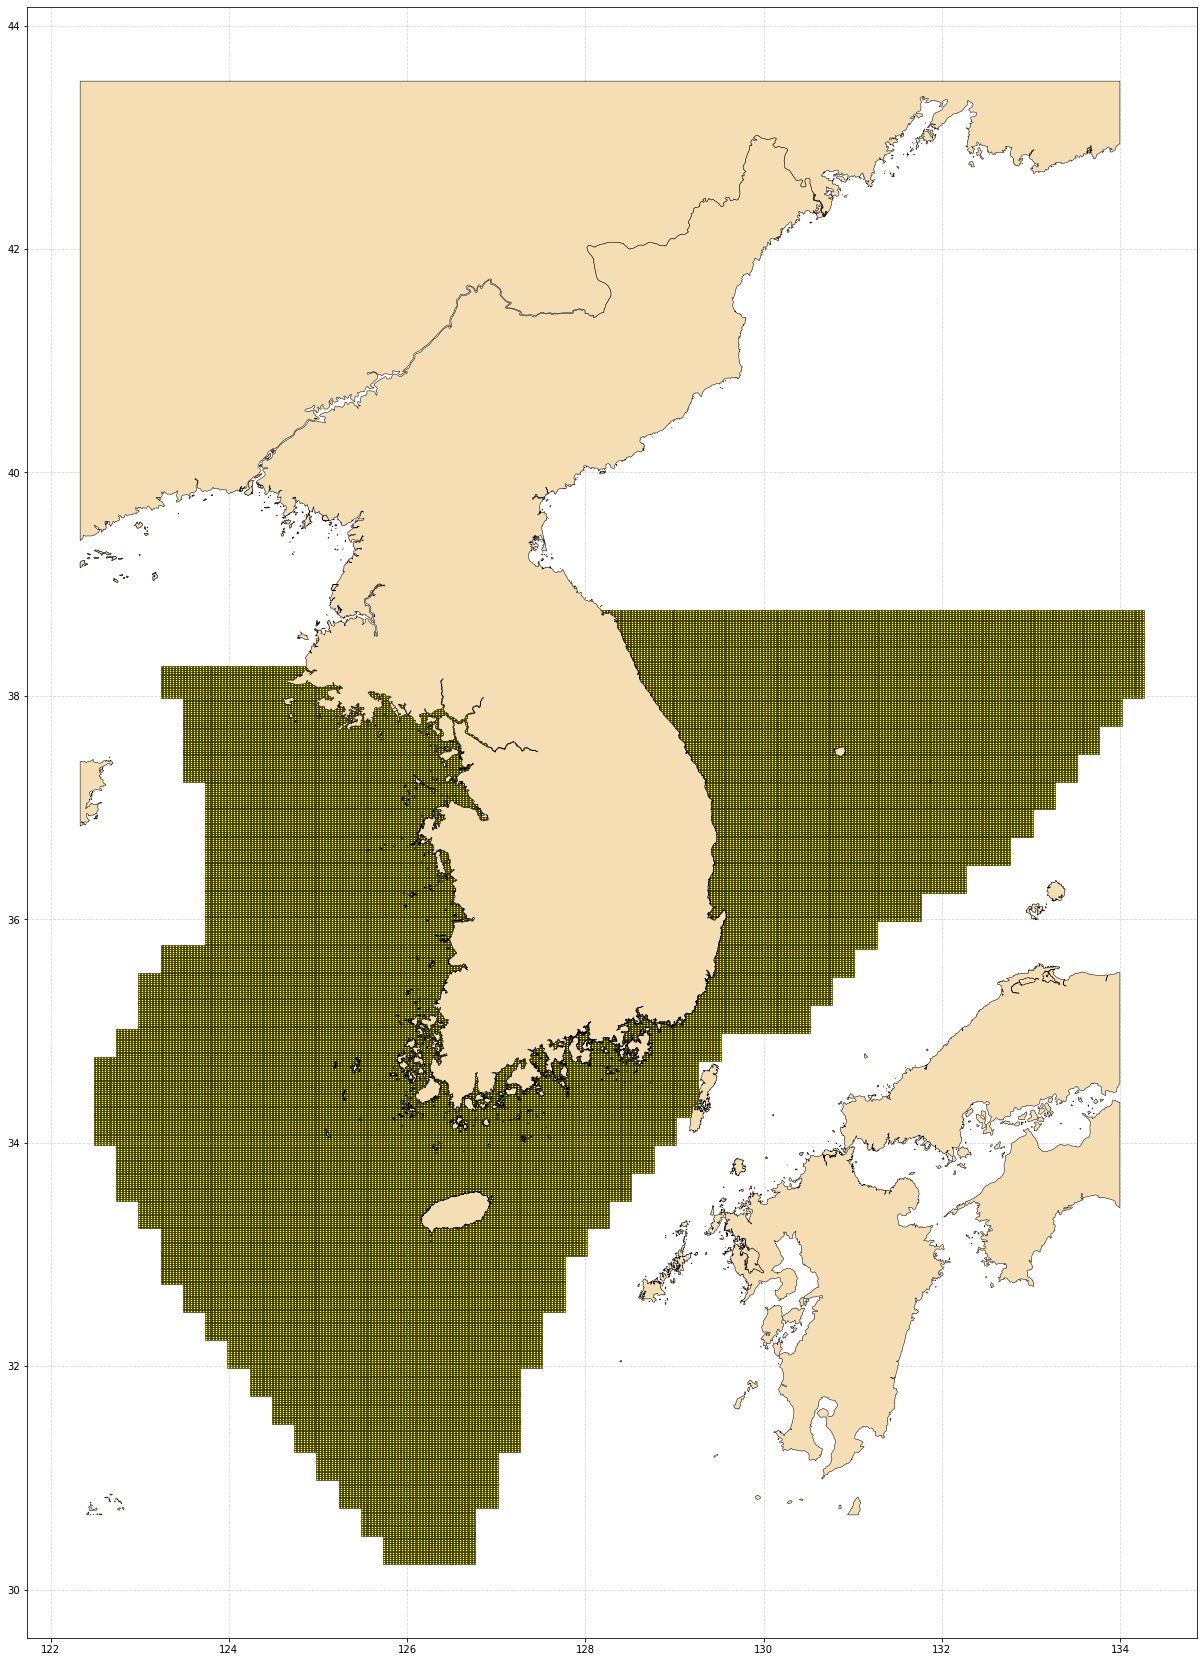

In [32]:
ax = result2.plot(figsize=(50, 30),facecolor='yellow', edgecolor='black',linewidth=0.5, zorder=1)
coastline.plot(facecolor='wheat', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
plt.grid(True, alpha=0.5, linestyle='--')
plt.savefig('./result/ex4/15분격자EEZ로자른걸1분에조인한거.png')